In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings #supress warnings of EOL of some methods

In [2]:
#Reading the dataset.
file_path = '/kaggle/input/health/health_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
#displaying some data
print(data.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [4]:
#checking if there are any anomalies like unfilled fields
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [5]:
#Using data.describe function to describe my dataset/ insights
#print("\nSummary Statistics:")
#print(data.describe())

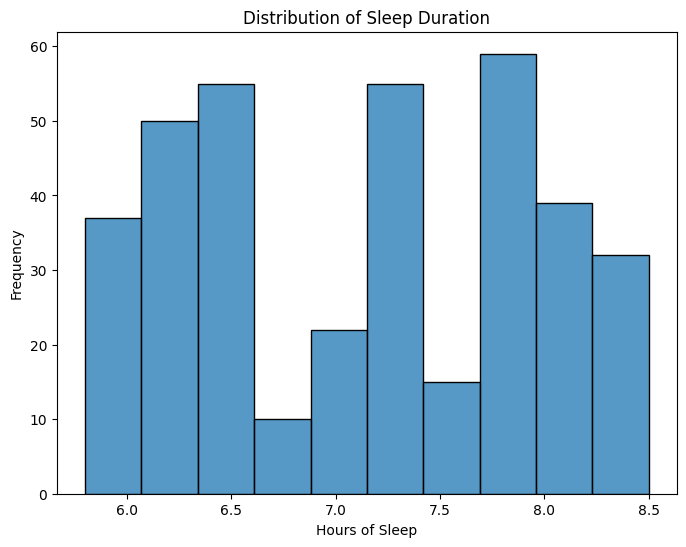

In [6]:
#DATA analysis of the dataset starts here
warnings.filterwarnings("ignore", category=FutureWarning)
#How many people sleep for the said no. of hours
plt.figure(figsize=(8,6))
sns.histplot(data['Sleep Duration']) #kde is for estiamted probability density, bins for the no.of data grouped
plt.title('Distribution of Sleep Duration')
#Bins: The x-axis of the histogram is divided into intervals, called bins. Each bin represents a set of values. For example, if your bin is 1 hour wide, the bin can cover 6 to 7 hours of sleep.
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
#Frequency: The y-axis of the histogram represents the frequency, calculated from data points (hours of sleep in this case) falling into each bin for, if 50 people slept for 6 to 7 hours, frequency the number of those bins will be 50
plt.show()

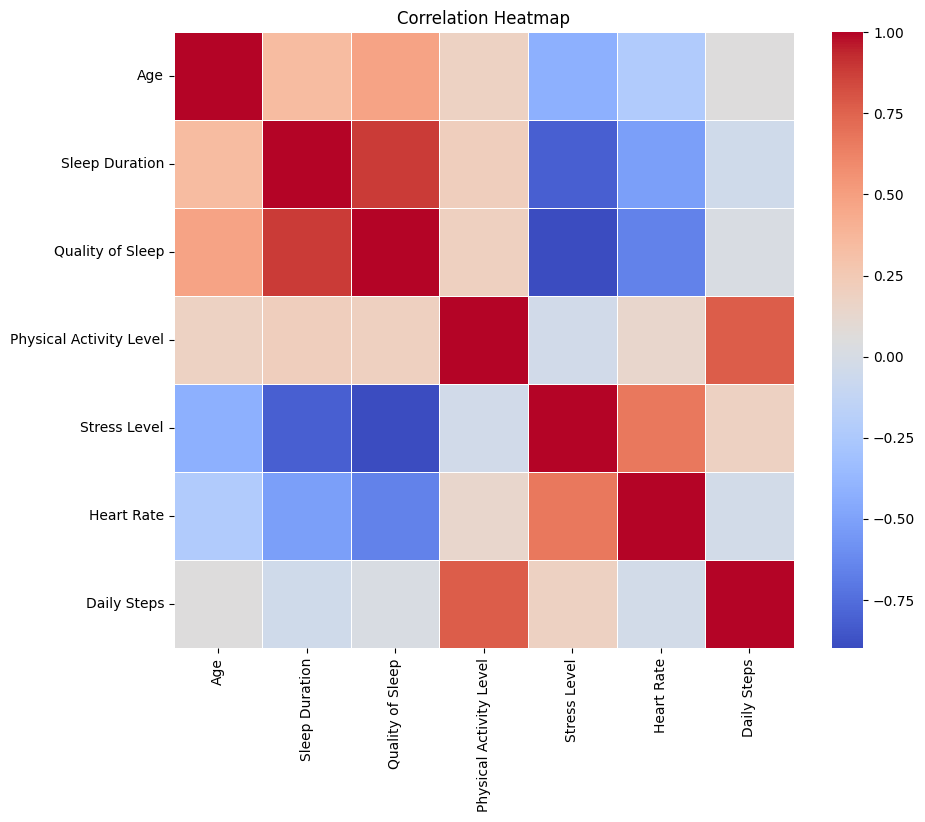

In [7]:
#in correlation data we cannot have non numeric data so we select only numeric data
numeric_data = data.select_dtypes(include='number').drop(columns=['Person ID'])

#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

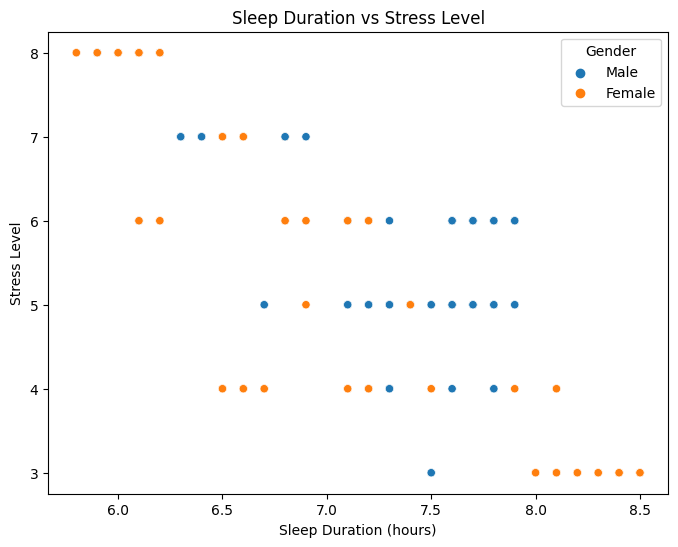

In [8]:
#Relationship between Sleep Duration and Stress Level
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=data, hue='Gender')
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.show()

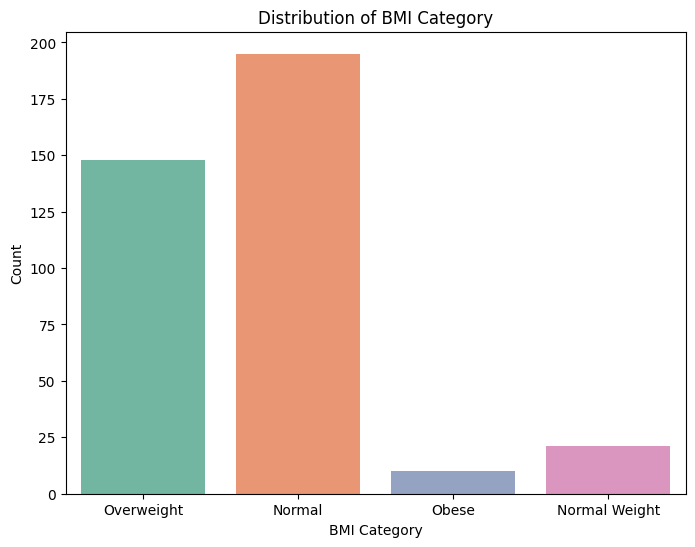

In [9]:
# Distribution of BMI Category
plt.figure(figsize=(8,6))
sns.countplot(x='BMI Category', data=data, palette='Set2')
plt.title('Distribution of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

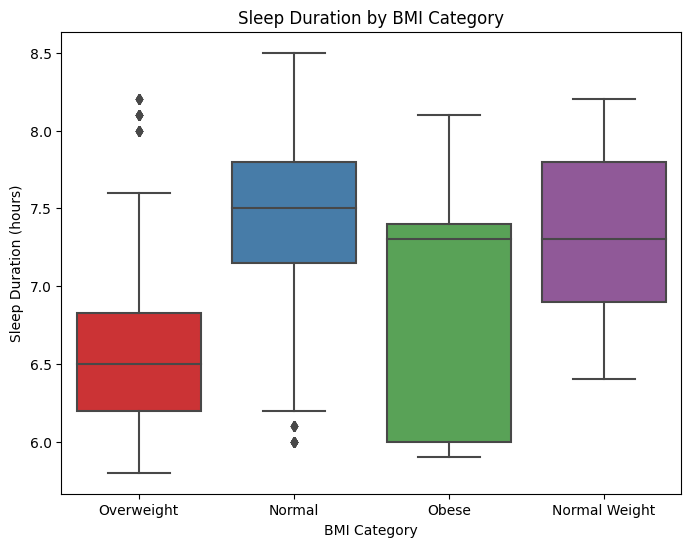

In [10]:
#Boxplot of Sleep Duration with BMI Category
plt.figure(figsize=(8,6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=data, palette='Set1')
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

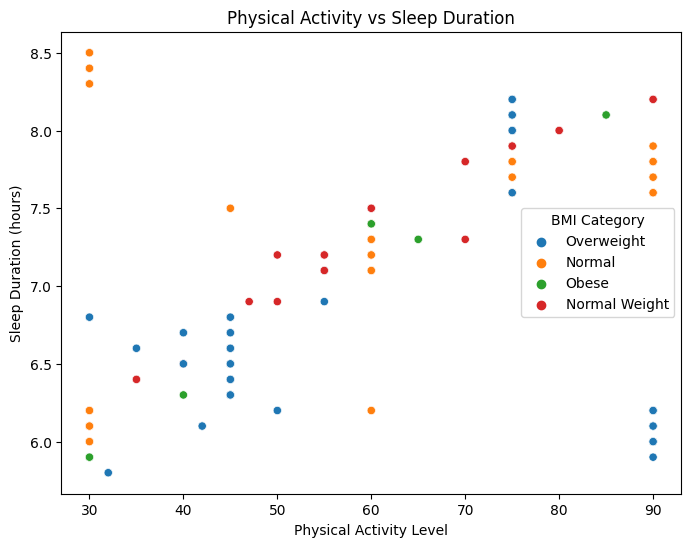

In [11]:
#Physical Activity vs Sleep Duration
plt.figure(figsize=(8,6))
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', data=data, hue='BMI Category')
plt.title('Physical Activity vs Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

In [12]:
# Droping rows so that we can target it in y
data = data.dropna(subset=['Sleep Disorder'])

#Setting the constraints for X and Y , X will be used for predicting the target variable Y
X = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category']]
y = data['Sleep Disorder']

#Setting numeric and categorical columns
numeric_features = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']
categorical_features = ['BMI Category']

# Create transformers for numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean') #for missing numerical values we calcualate the mean of the column and place it
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),#for missing categorical values, we reaplace with most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))#converting categorical values into separate binary column
])

#Using Column Transformer to set the preprocessing steps for the different transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#applying preprocessing features to the X features
X_preprocessed = preprocessor.fit_transform(X)
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42) #here test sie is 0.2 which means 20% of data is reserved for testing  purposes and x train and y train are used to train our model and then we use x test and y test for testing the model accuracy
#Initializes a Random Forest classifier, which is an ensemble learning method that uses multiple decision trees to make predictions
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)
# after training using it to predict the test sets
y_pred = clf.predict(X_test)




# Evaluating the model (accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.79      0.79      0.79        14
 Sleep Apnea       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


Accuracy Score:
0.8064516129032258


In [13]:
#Creating a data frame to show the actual data and predicted data
predictions_df = pd.DataFrame({
    'Actual Data': y_test,
    'Predicted Data': y_pred,
})
# Displaying the DataFrame with both actual and predicted sleep disorders
print(predictions_df)

     Actual Data Predicted Data
258     Insomnia       Insomnia
361  Sleep Apnea    Sleep Apnea
191     Insomnia       Insomnia
189     Insomnia       Insomnia
306     Insomnia       Insomnia
235     Insomnia       Insomnia
274  Sleep Apnea    Sleep Apnea
366  Sleep Apnea    Sleep Apnea
372  Sleep Apnea    Sleep Apnea
243     Insomnia       Insomnia
202     Insomnia    Sleep Apnea
355  Sleep Apnea    Sleep Apnea
255     Insomnia       Insomnia
252     Insomnia       Insomnia
103  Sleep Apnea       Insomnia
145  Sleep Apnea    Sleep Apnea
190     Insomnia       Insomnia
271  Sleep Apnea    Sleep Apnea
305  Sleep Apnea    Sleep Apnea
354  Sleep Apnea    Sleep Apnea
144  Sleep Apnea       Insomnia
81   Sleep Apnea    Sleep Apnea
49   Sleep Apnea       Insomnia
184  Sleep Apnea    Sleep Apnea
244     Insomnia       Insomnia
348  Sleep Apnea    Sleep Apnea
276  Sleep Apnea    Sleep Apnea
220     Insomnia       Insomnia
266     Insomnia    Sleep Apnea
264     Insomnia    Sleep Apnea
340  Sle